In [9]:
import random
import collections

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import utils
import greedy_graph

input_files = ["a_example.txt", "b_lovely_landscapes",
               "c_memorable_moments", "d_pet_pictures", "e_shiny_selfies"]
file = input_files[2]
alignments, tags = utils.read_input(file)

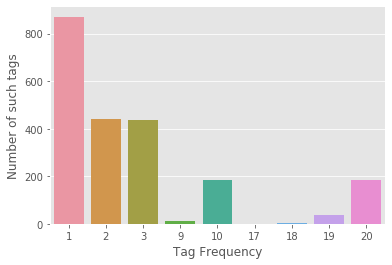

In [2]:
freq = collections.defaultdict(lambda: 0)

for image_tags in tags:
    for tag in image_tags:
        freq[tag] += 1

sns.countplot(list(freq.values()))
plt.xlabel('Tag Frequency')
plt.ylabel('Number of such tags')
plt.show()

Number of Images: 1000
Number of Unique tags: 9476


Text(0, 0.5, 'Number of such images')

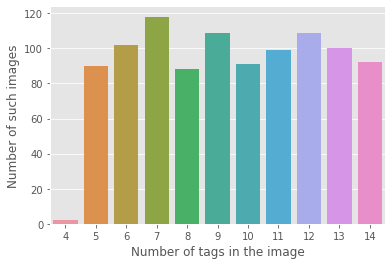

In [3]:
print("Number of Images:", len(tags))
print("Number of Unique tags:", sum(freq.values()))

sns.countplot(list(map(len, tags)))
plt.xlabel('Number of tags in the image')
plt.ylabel('Number of such images')

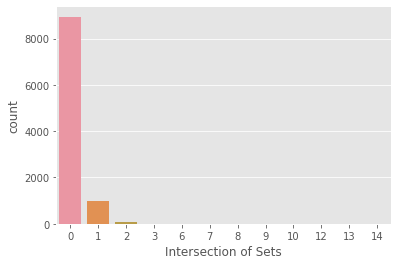

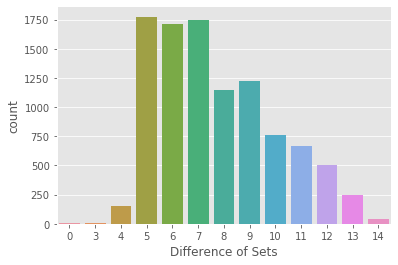

In [4]:
correlation = []
difference = []
for i in range(10000):
    x = set(random.choice(tags))
    y = set(random.choice(tags))
    correlation.append(len(x & y))
    difference.append(min(len(x), len(y)) - len(x & y))
sns.countplot(correlation)
plt.xlabel('Intersection of Sets')
plt.show()
sns.countplot(difference)
plt.xlabel('Difference of Sets')
plt.show()

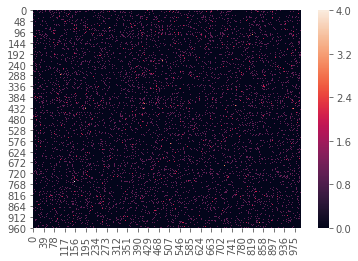

In [7]:
scores = np.zeros((len(tags), len(tags)), dtype=np.int32)
for u in range(len(tags)):
    for v in range(len(tags)):
        scores[u][v] = utils.slide_score(tags, u, v)
sns.heatmap(scores)
plt.show()

Total Score: 1441


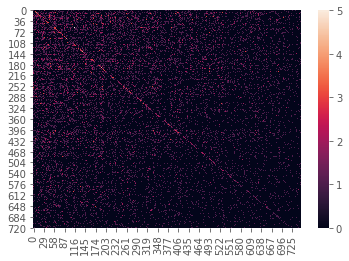

In [14]:
horizontal_images, vertical_images = greedy_graph.separate_horizontal_vertical(alignments)
slides = greedy_graph.greedy_match_vertical(vertical_images, tags) + horizontal_images
solution = greedy_graph.greedy_arrange_slides(slides, tags)
print("Total Score: %s" % utils.score(file, solution))

scores = np.zeros((len(solution), len(solution)), dtype=np.int32)
for i, u in enumerate(solution):
    for j, v in enumerate(solution):
        scores[i, j] = utils.slide_score(tags, u, v)
sns.heatmap(scores)
plt.show()
